Note: Code snippets and notes are based on "Containerization and Virtualization with Docker and Kubernetes" track from DataCamp. Also some contents are AI generated.

# Part 1: Introduction to kubernetes(K8s)

## Modern Software Architecture, Containerization, and Kubernetes
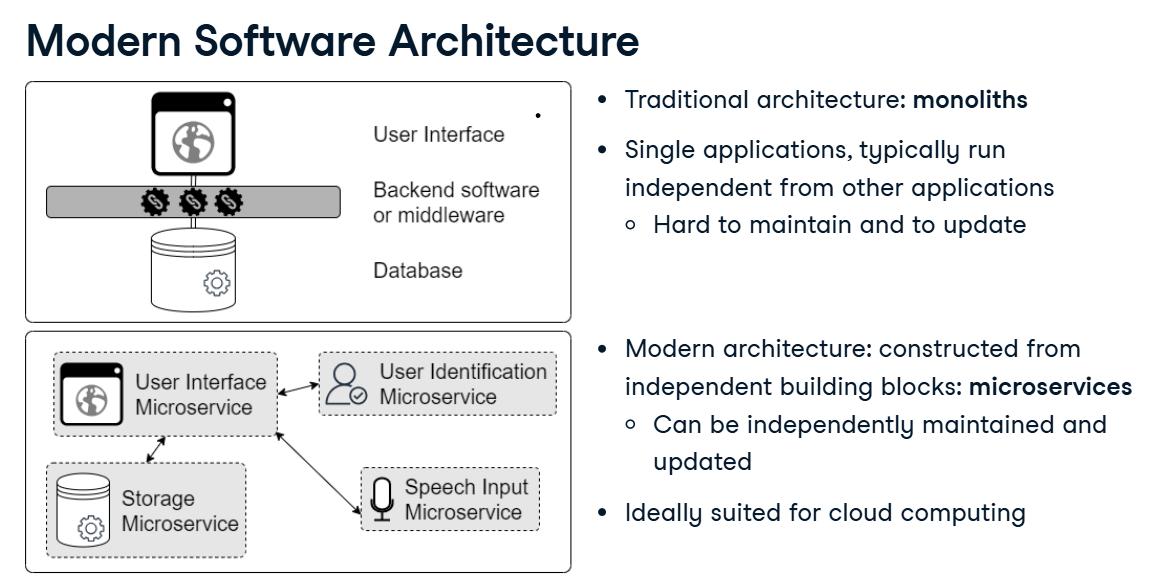

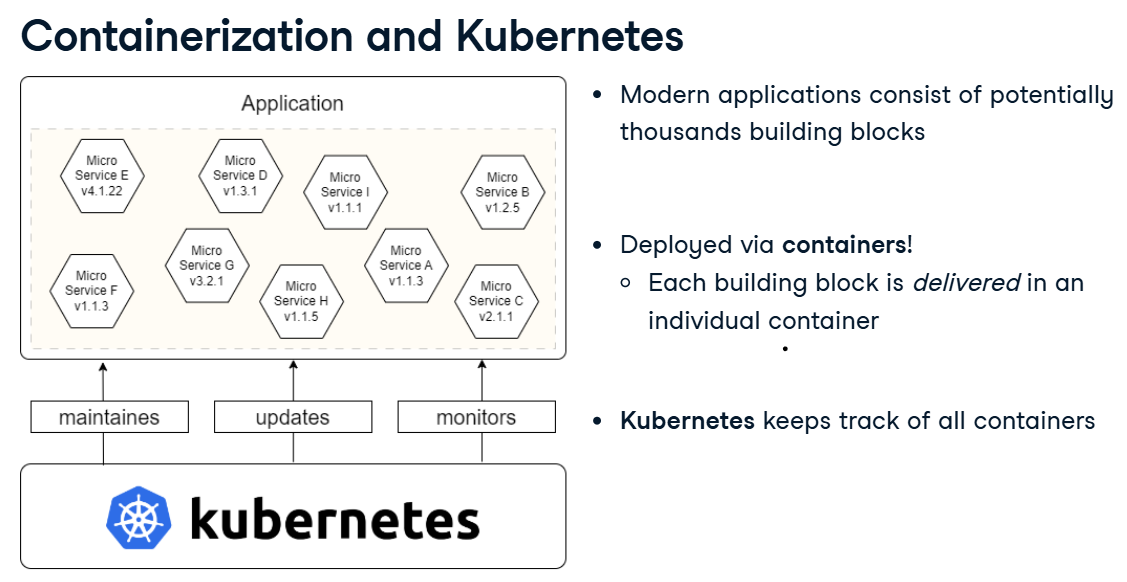

Clouds provide infrastructure like virtual machines for computing, networks to connect these machines, and storage that all machines can access concurrently. All of this infrastructure can be scaled, which means that we can lease more or less of each component independently of each other. For example, if we currently use three virtual machines to run our application, we can add two more machines and use them immediately. We can also purchase more storage for our application without increasing the number of virtual machines. Now, a cloud-native application has been designed to use the scalable infrastructure efficiently. One way to achieve this is using containerization and Kubernetes. Kubernetes is cloud-native, which makes deploying and managing our application very simple. It also enables easy scaling of applications.

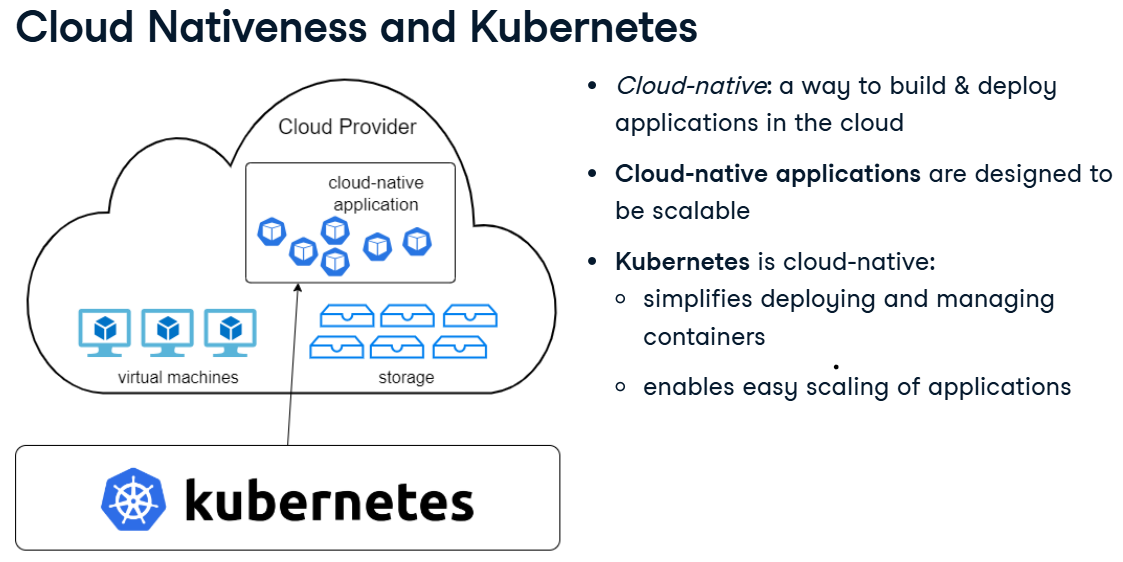


## Docker annd kubernetes
Kubernetes is available for all important environments. You can use it in any cloud, but also on-prem, or even in hybrid scenarios. That makes it an excellent solution for deploying your software.

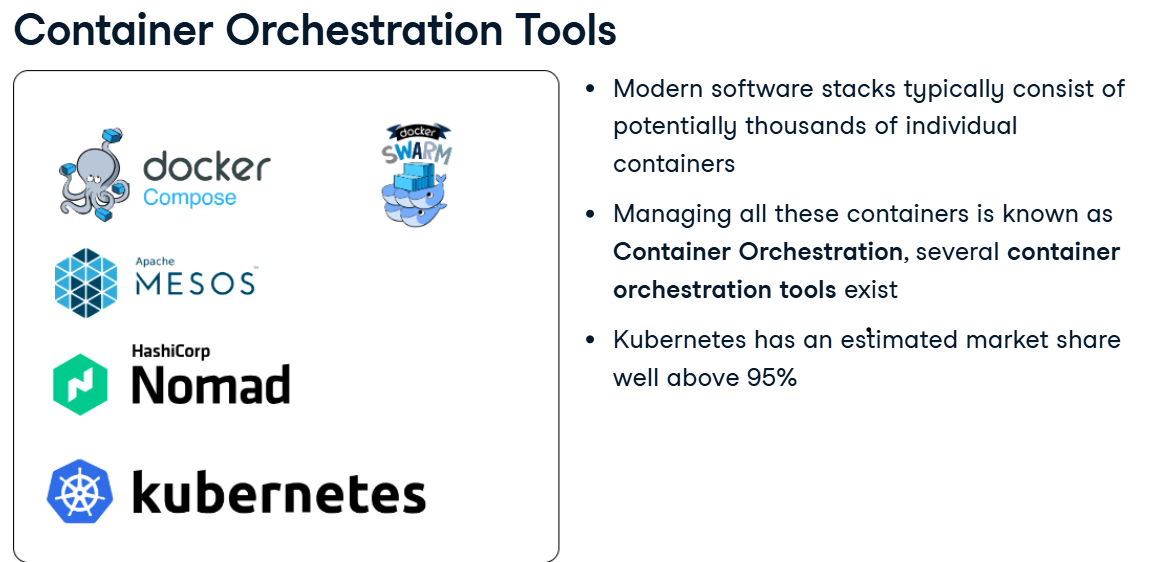

why has Kubernetes gained so much popularity? Well, it makes solving the typical challenges of container orchestration relatively easy. These challenges are: when to deploy your containers and on which physical hardware, how to enable networking for container communication, what to do when a container stops working, how to make sure that your containers are started and stopped in the right order, or how to attach storage. To solve all those challenges, Kubernetes interacts with so-called "Container Engines" that live on each computer you want to run your containers on. Kubernetes tells the container engines to start or stop your containers in the correct order and in the right place. 

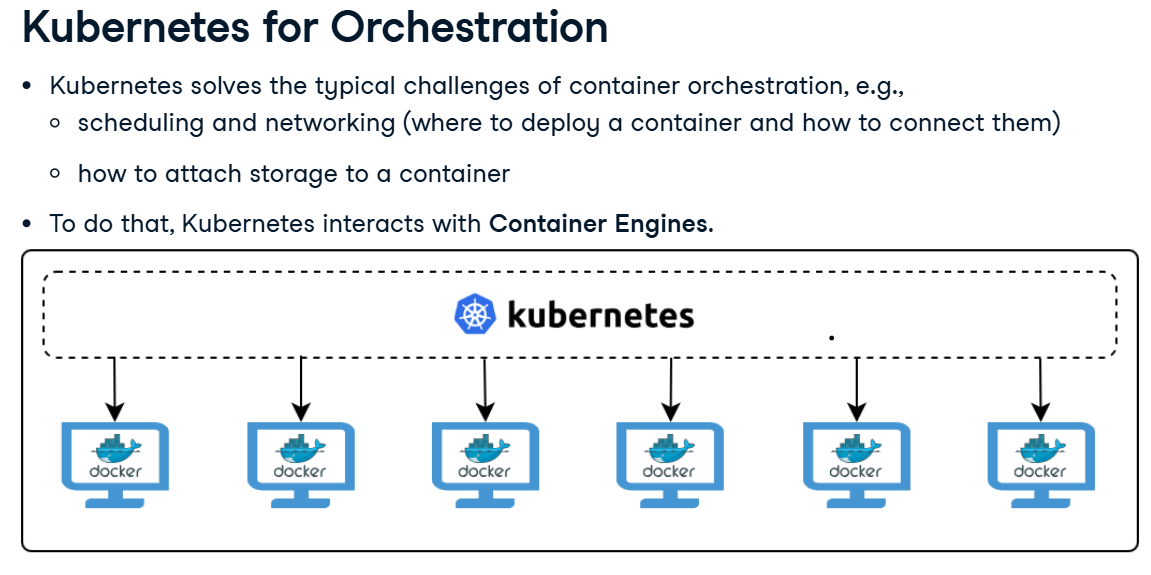

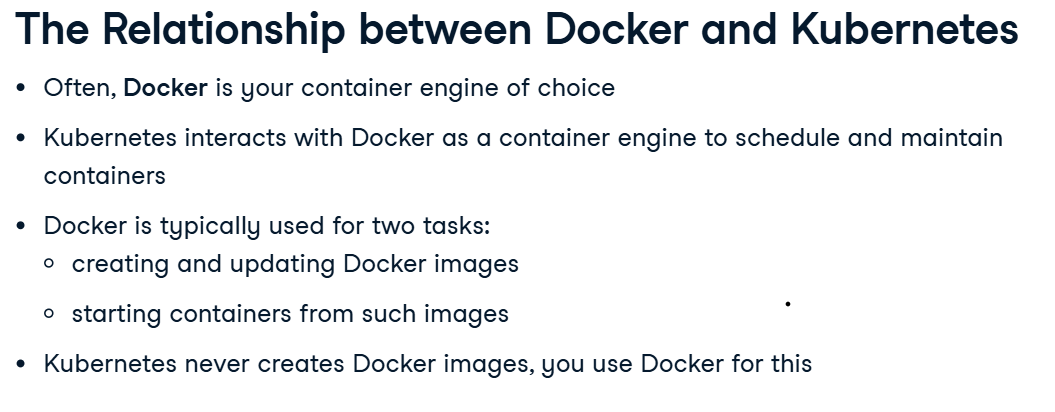

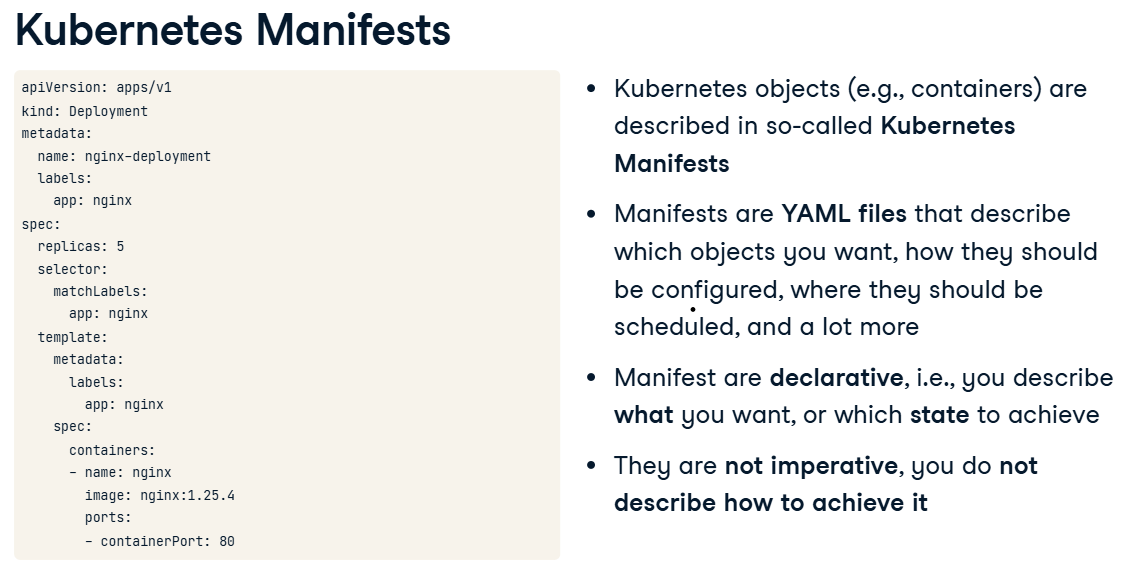

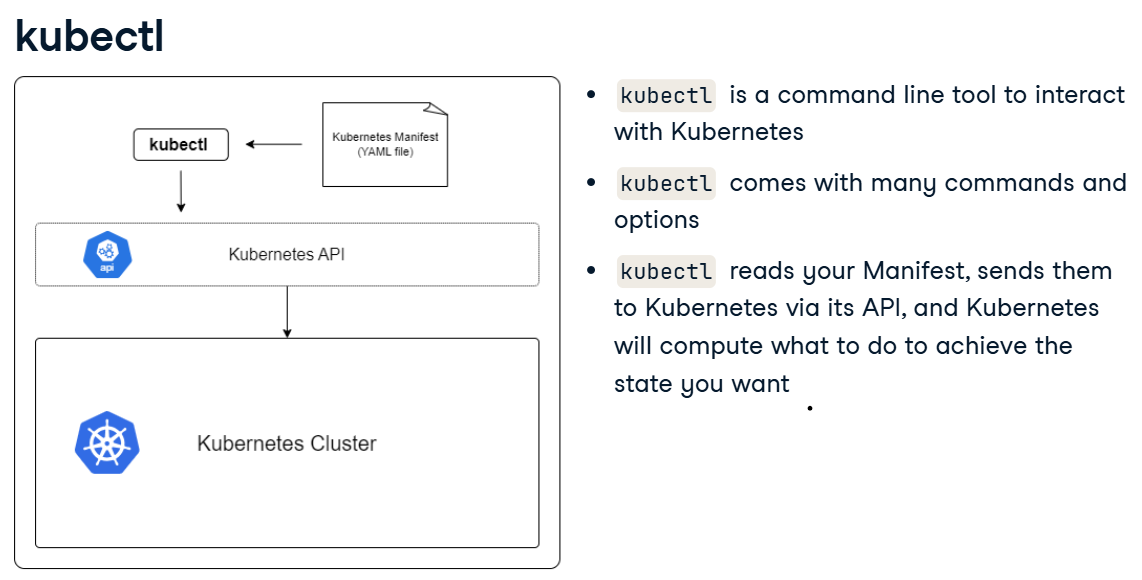

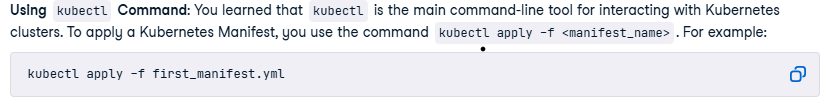

## Kubernetes Architecture
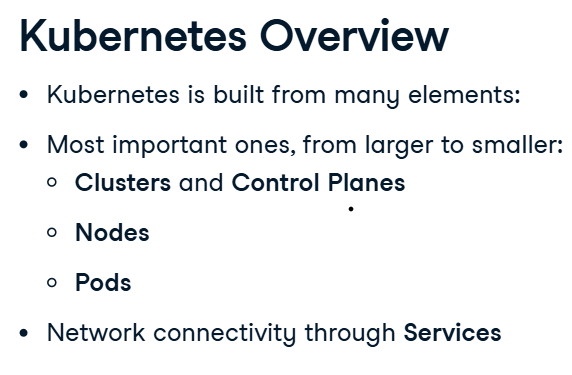

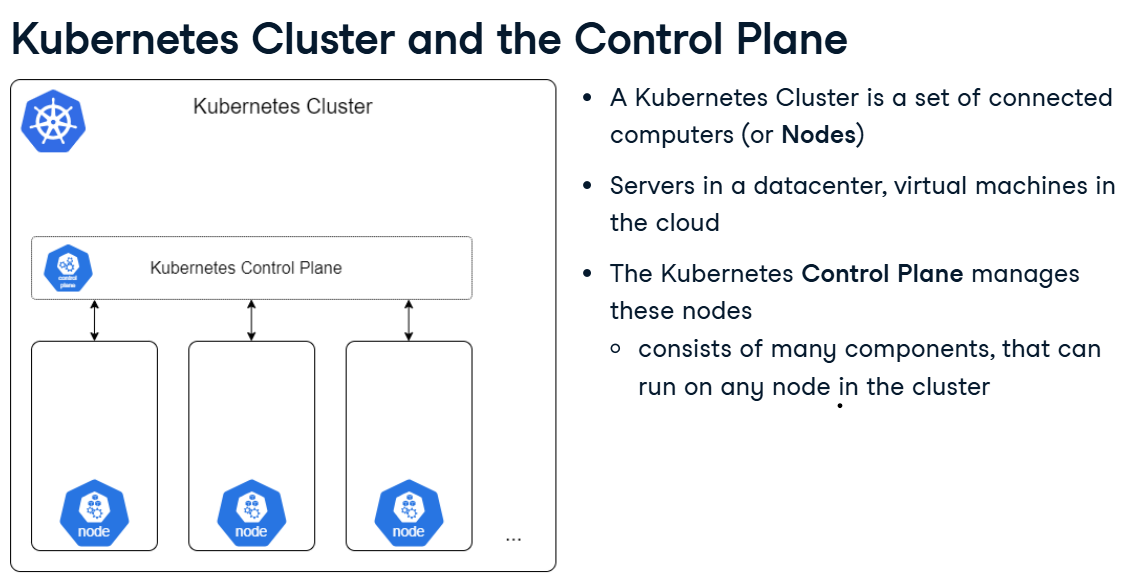

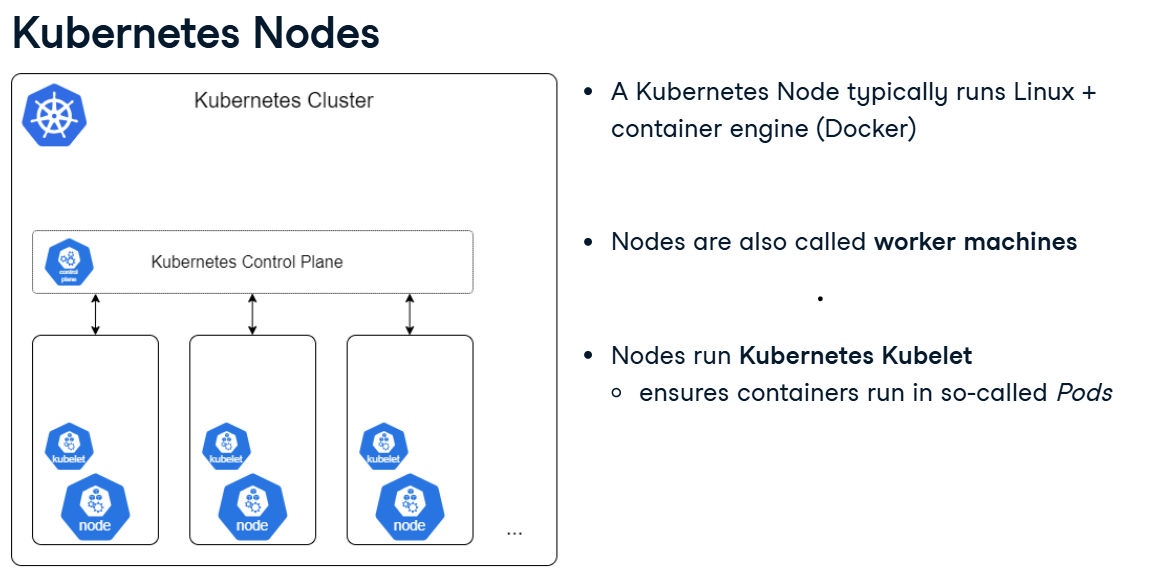

we can add or remove nodes from and to your Kubernetes Cluster at any point in time without any downtimes.

Pods are what we call "ephemeral". That means they live only for a relatively short time, and they can and will be terminated and recreated on other nodes at any point in time. Pods' ephemeral nature, being terminated and recreated frequently, might seem counterintuitive for stability. However, this design grants Kubernetes the flexibility to manage incidents efficiently, enhancing overall application reliability.



A Service is a resource to expose network connectivity. When we want to connect to our Pod or when we want to establish communication between Pods, we need to deploy such a service. The reason for this comes from the ephemeral nature of the Pods: Each Pod has its own unique IP address, which changes any time our Pod gets redeployed. Now, Services are not ephemeral, they offer stable connectivity. In the picture on the left, two services have been deployed. Service number 1 has connected all the gray Pods to it, so whenever you call that service, one of the gray Pods will respond. Service number 2 is connected to the purple pods, so calling that service gives you a response from one of these three pods.

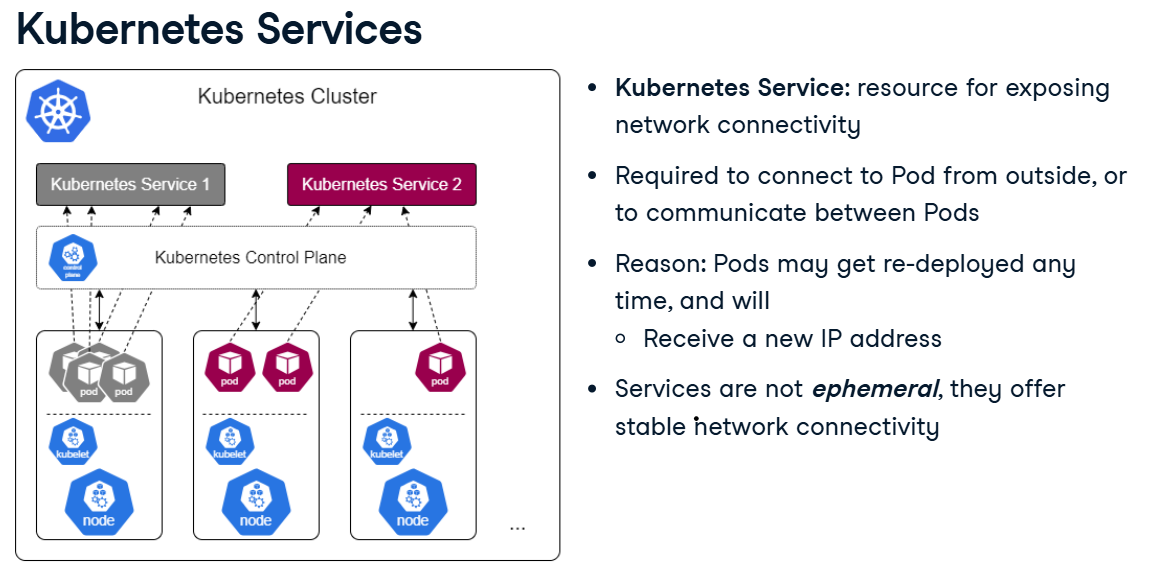

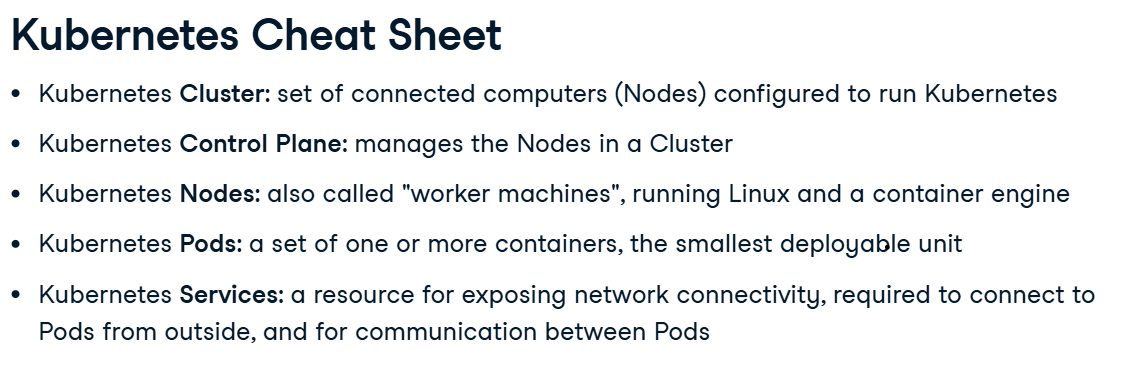

# Part 2: Deploying Software on Kubernetes

## Deploying a first (stateless) application
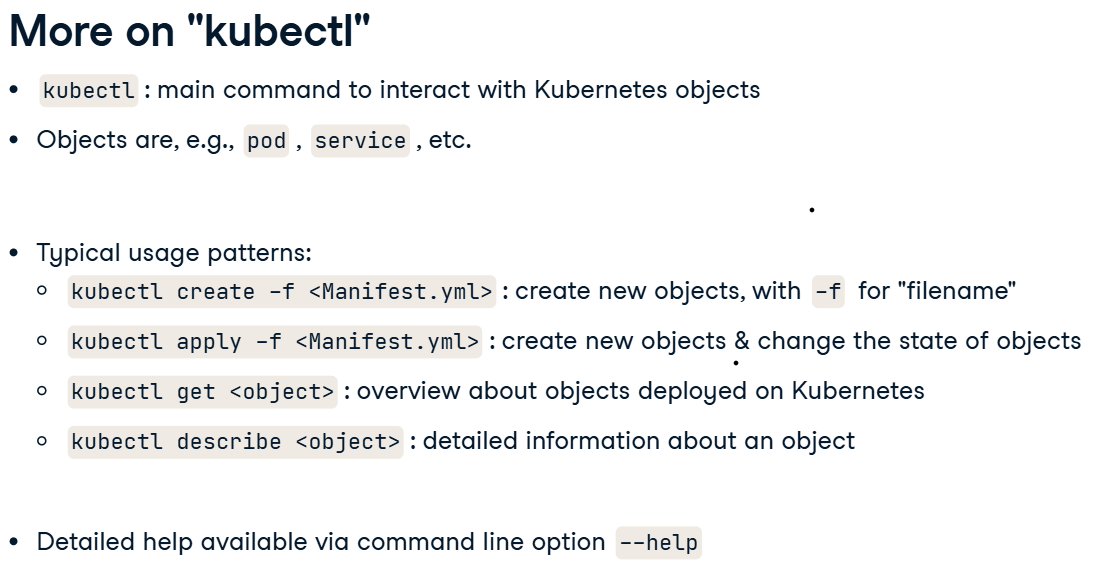

### Stateless applications
Stateless applications are software programs or services that do not retain any information (state) about user sessions or past interactions between requests. Each request made by a client to the server is treated as completely independent, with no memory of previous requests.

Common Examples:
RESTful APIs: Each API call is independent and does not rely on previous interactions.

Static websites: Served from a CDN, with no server-side memory of interactions.

Microservices: Often designed to be stateless to ensure scalability and reliability.

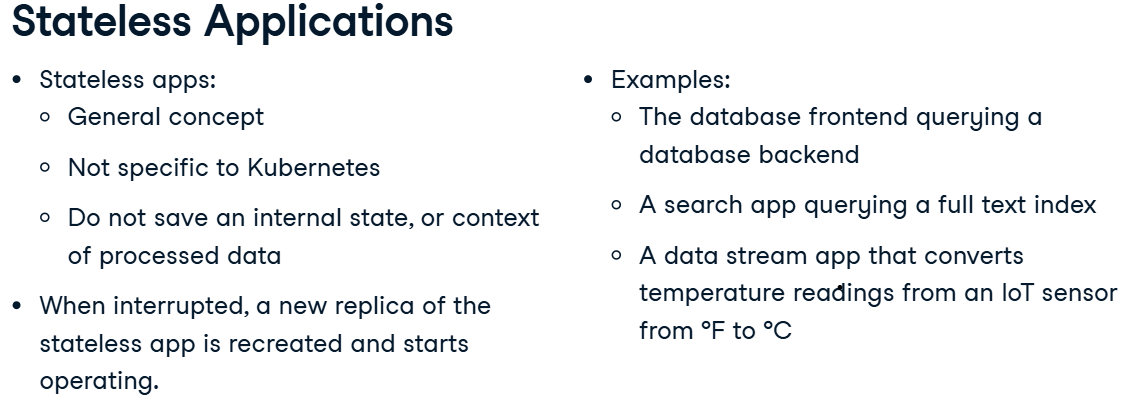

In Kubernetes stateless applications can be realized easily with "Kubernetes Deployments". Here, you can see a sample Manifest for such a Deployment. Let us go through the individual sections of this Manifest: `apiVersion` defines the K8s API and version to be used. For deployments, we use `apps/v1`. `kind` indicates that we will create a K8s Deployment. The `metadata` section defines various meta information we will cover later in this course. The `spec` section defines the detailed specification of our Deployment: For example, `replicas` defines the number of replicated pods the Deployment should consist of. `selector` is used to define how pods will be managed. Kubernetes will use the selector rule to find individual pods for applying changes. Finally, `template` defines how new pods are created. If K8s decides to create a new pod for the deployment, it uses the defined template to add `labels`, create `containers` with respective `name`, docker `image`, and other details like network `ports` for communication.



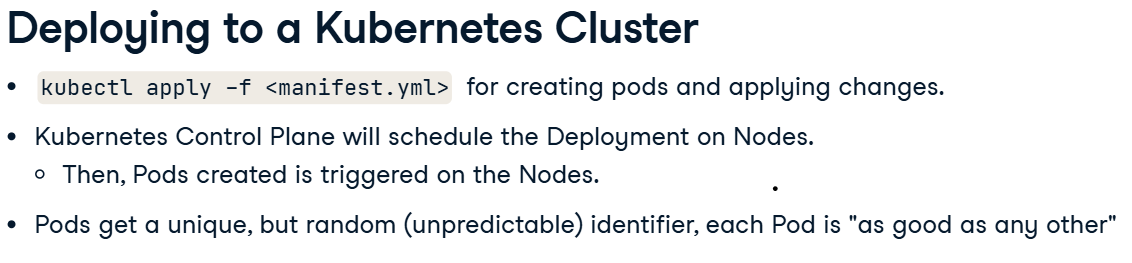

## Scaling and Monitoring an application
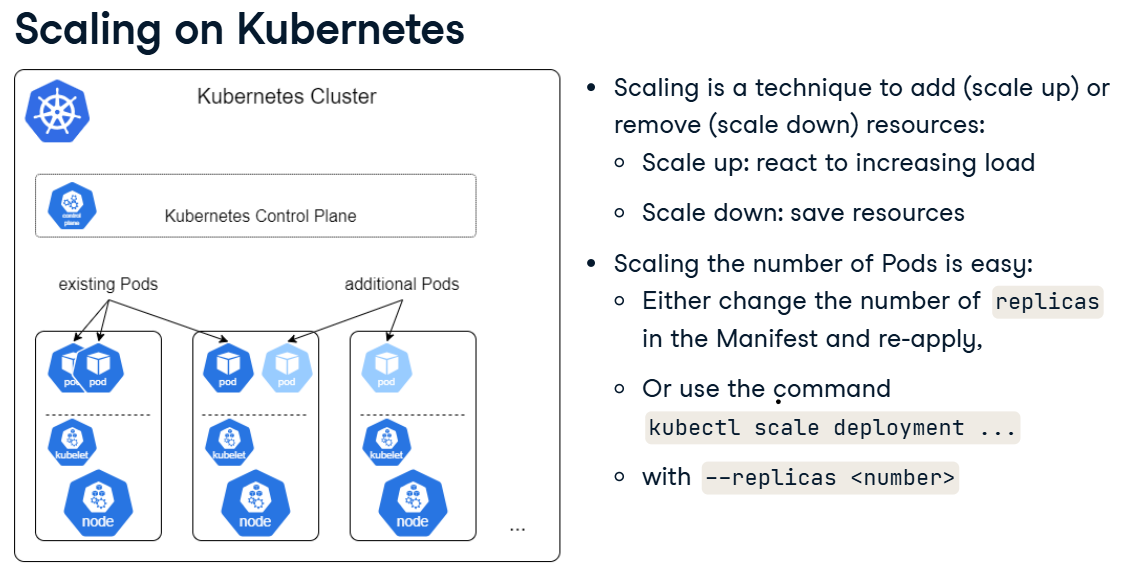

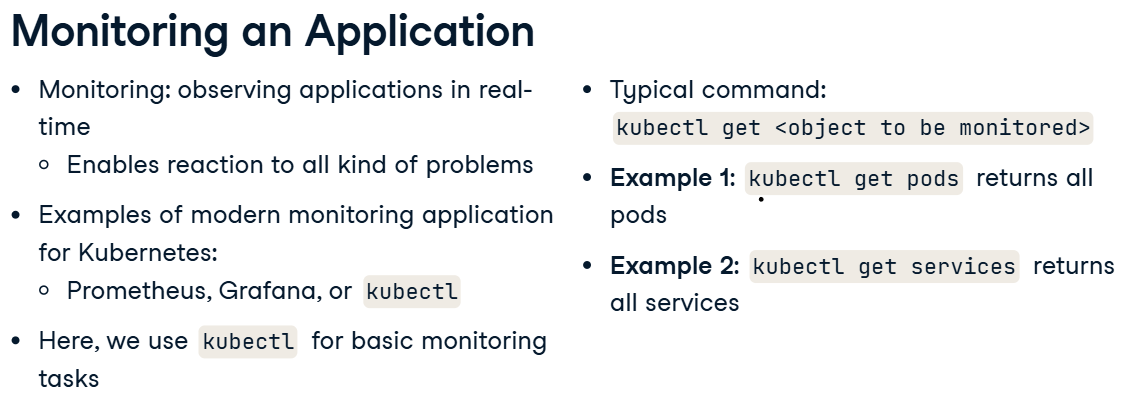



## Deploying, Scaling, and Monitoring a Stateful Application
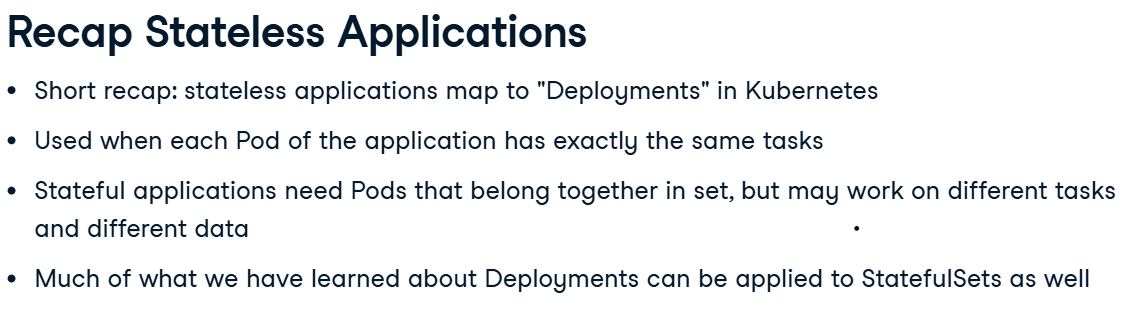

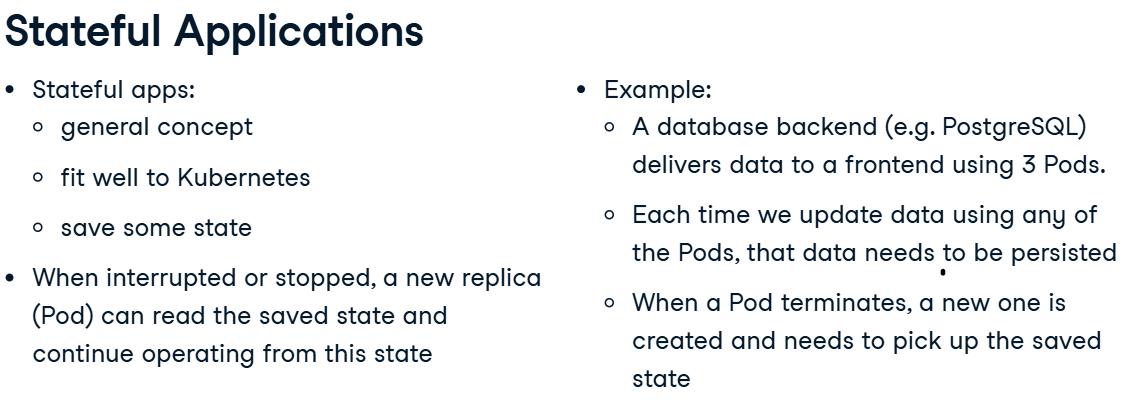

In Kubernetetes there are so-called "StatefulSets" which are used to create stateful applications. Here is a sample manifest for such a StatefulSet. A StatefulSet has the same sections that we know already: 'apiVersion', 'kind' for declaring a StatefulSet, 'metadata', and 'spec' for declaring detailed specifications of our StatefulSet, like the template for our Pods and the number of replicas.

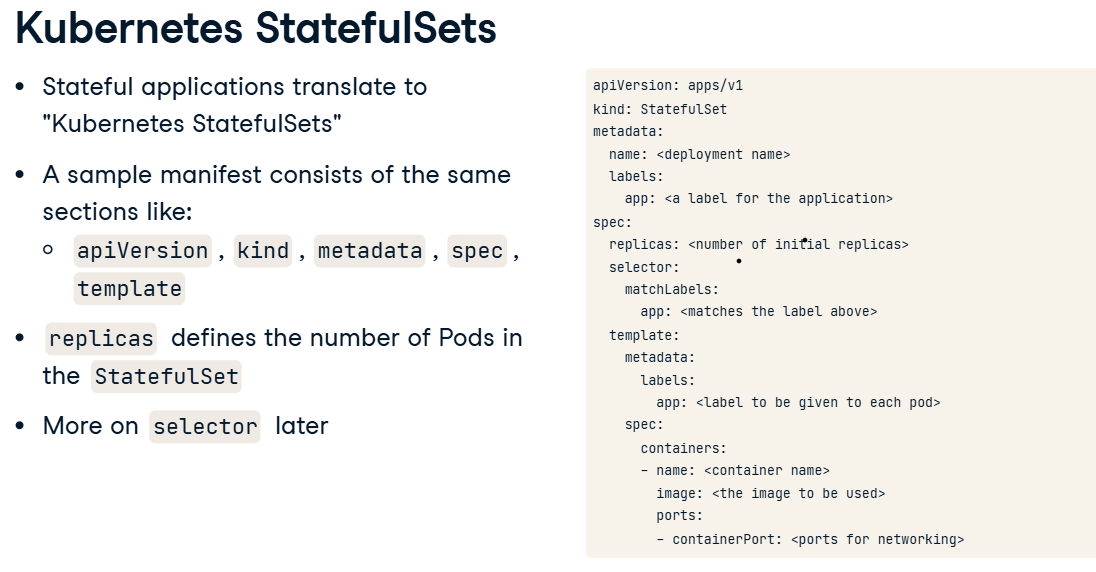

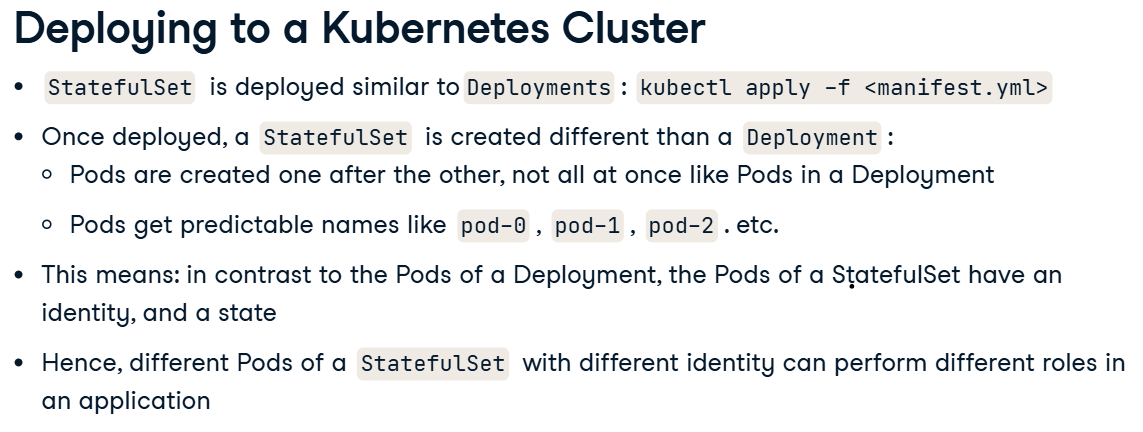

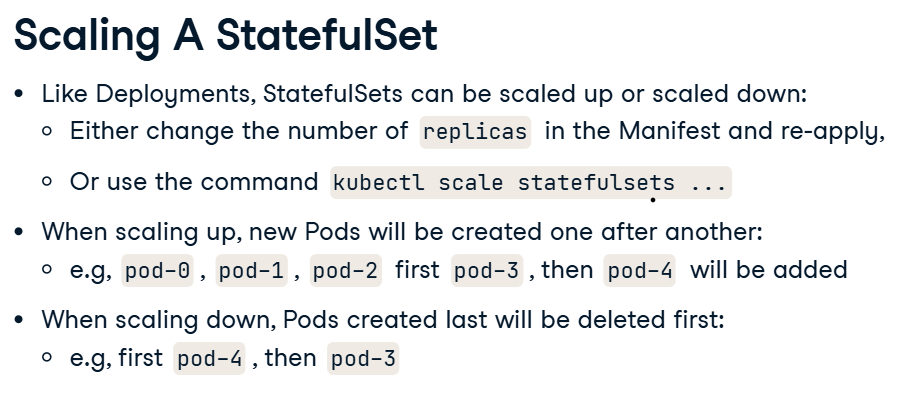

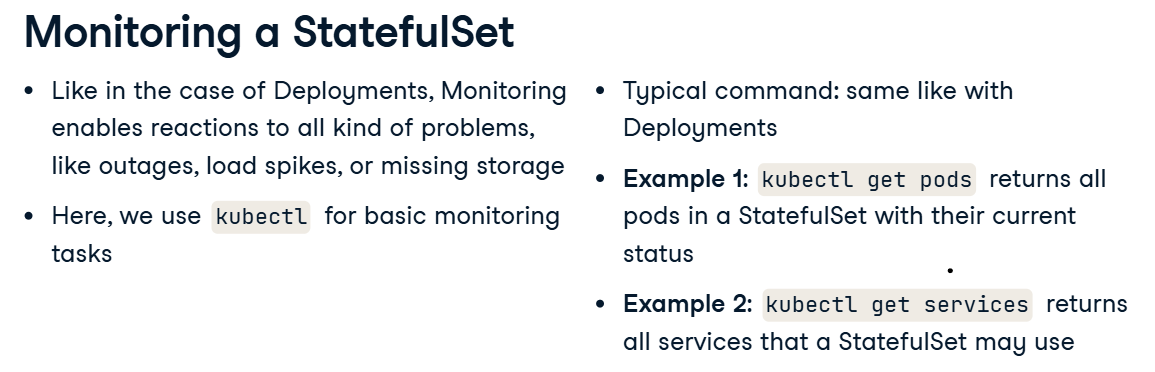

## Deploying, Scaling and Monitoring Kubernetes Storage
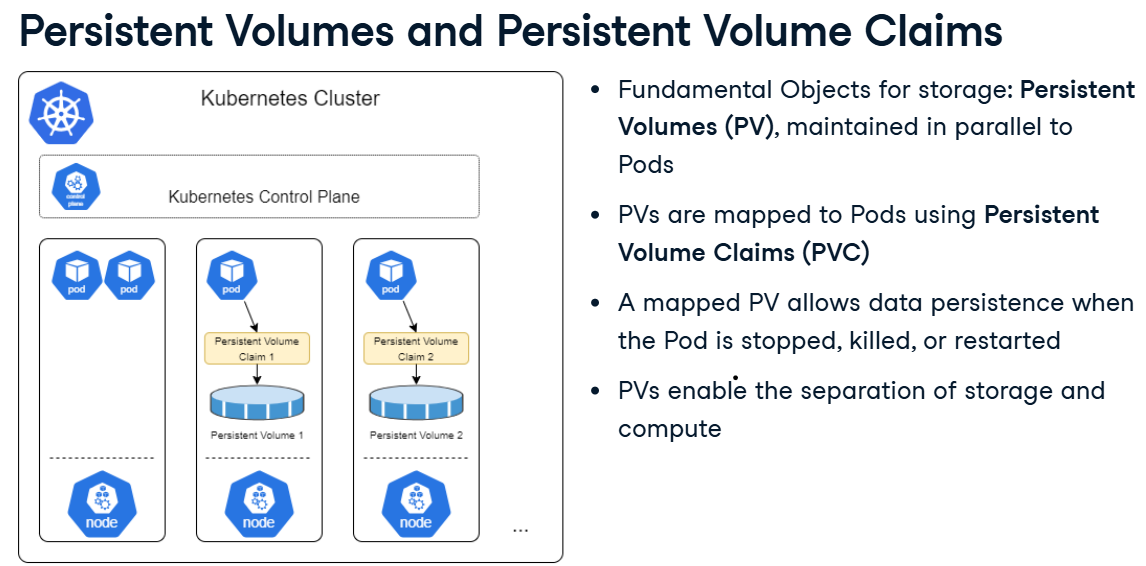

We provision PVs dynamically using so-called Storage Classes, or SCs for short. SCs are designed to provision persistent volumes without any human intervention. They define basic properties of PVs to be dynamically provisioned. This ensures that PVCs can be automatically matched with appropriate PVs based on storage needs. And hence so, this type of storage provisioning is a key enabler for automation. Now, Storage Classes are objects you simply use. These are created and maintained by your Kubernetes admin, which means they are ready to be used by you. Further, real-world Kubernetes, in general, provides different types of storage. Typically, these types are defined by different criteria like availability, latency, cost, or applied backup strategy. All in all, dynamic provisioning of PVs using Storage Classes is now standard in Kubernetes. If you are unsure what to do, use Storage Classes.

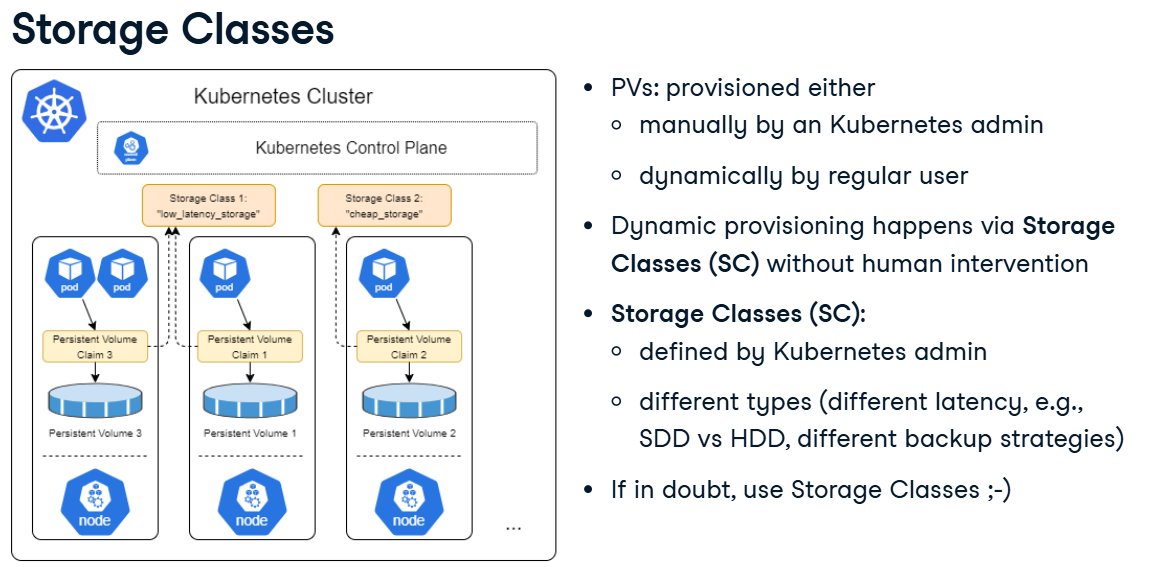

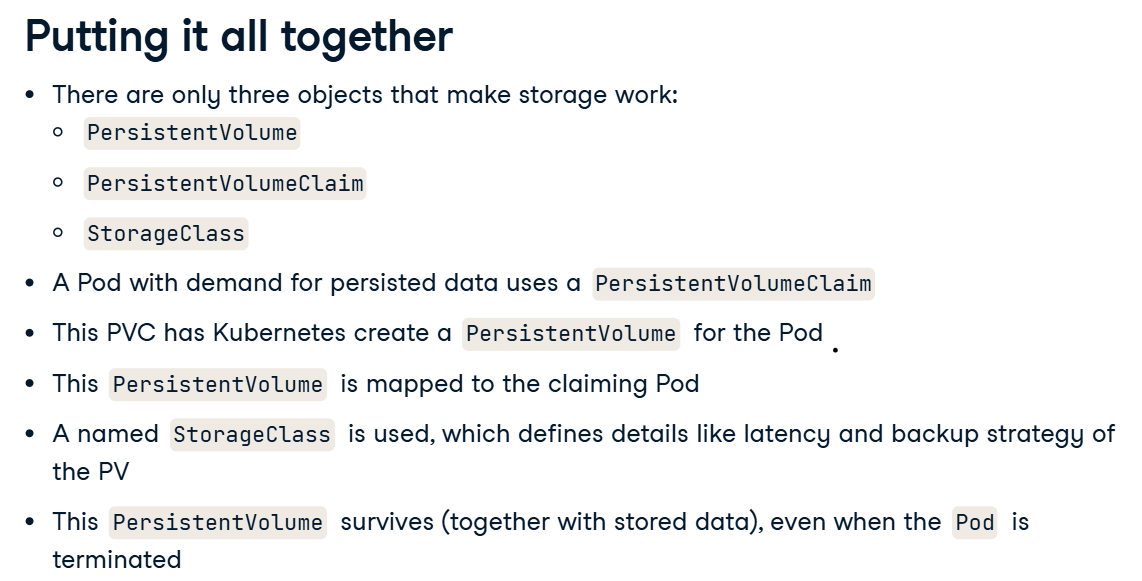

PersistentVolume survives, even when the claiming Pod is terminated or restarted. When restarted, the same existing PV will be bound to the Pod again, and hence, no data is lost.

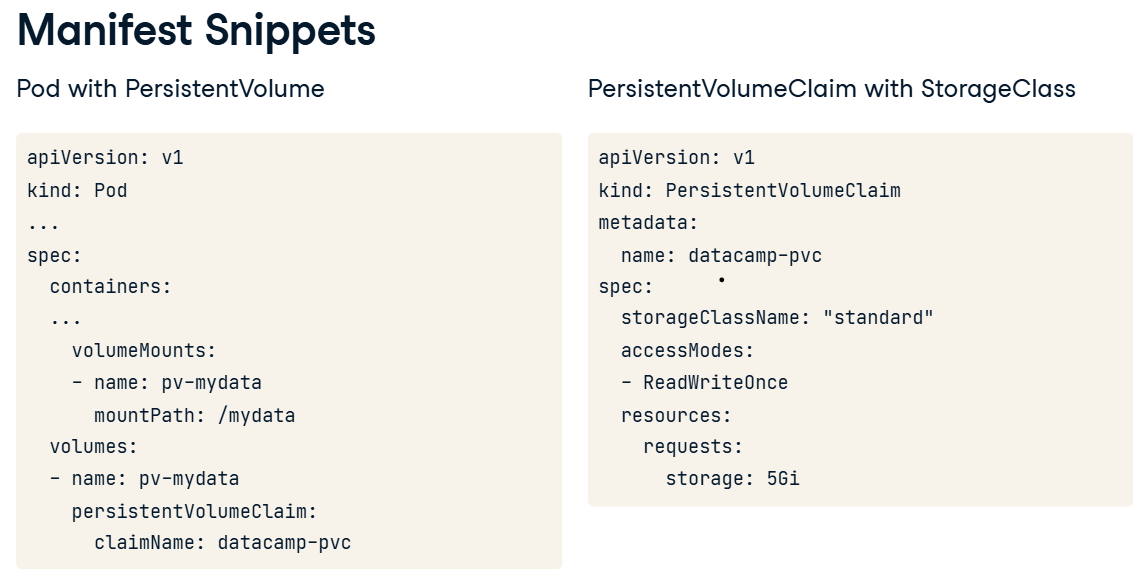

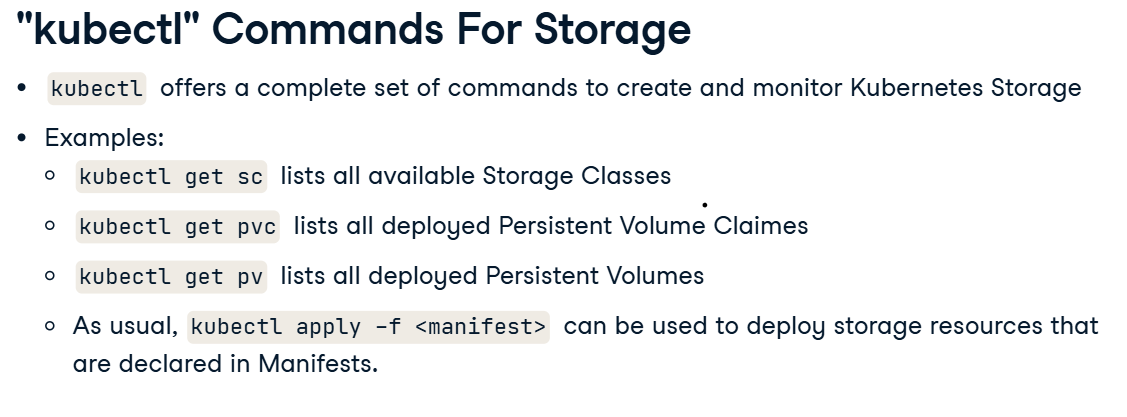

# Part 3: Data Engineering and MLOps

## Networking, Load Balancing, and Security

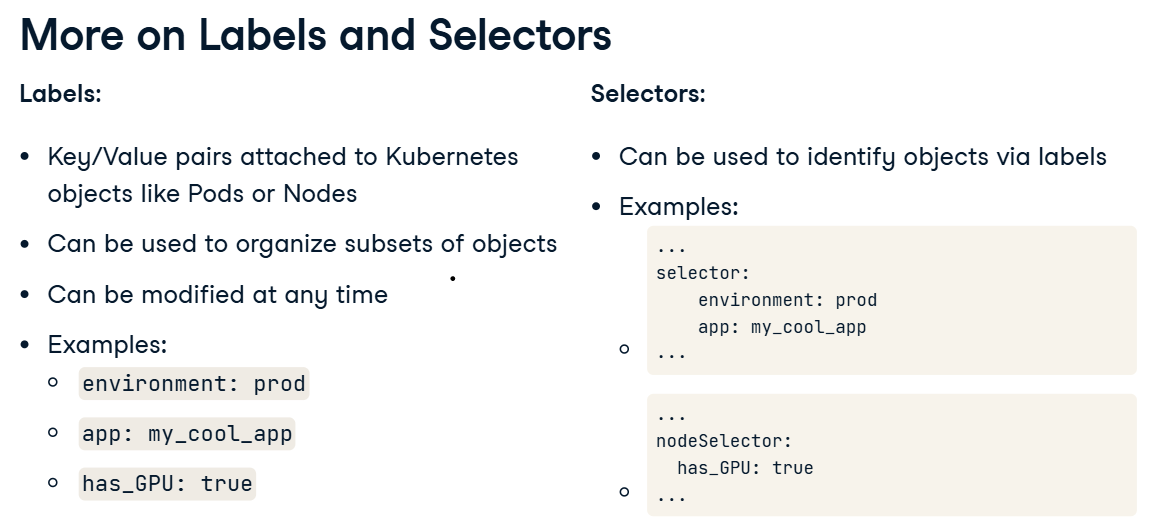

We use selectors to identify objects using these labels. For example, we could use the "has_GPU" label to schedule a Pod that needs the compute power of a GPU.

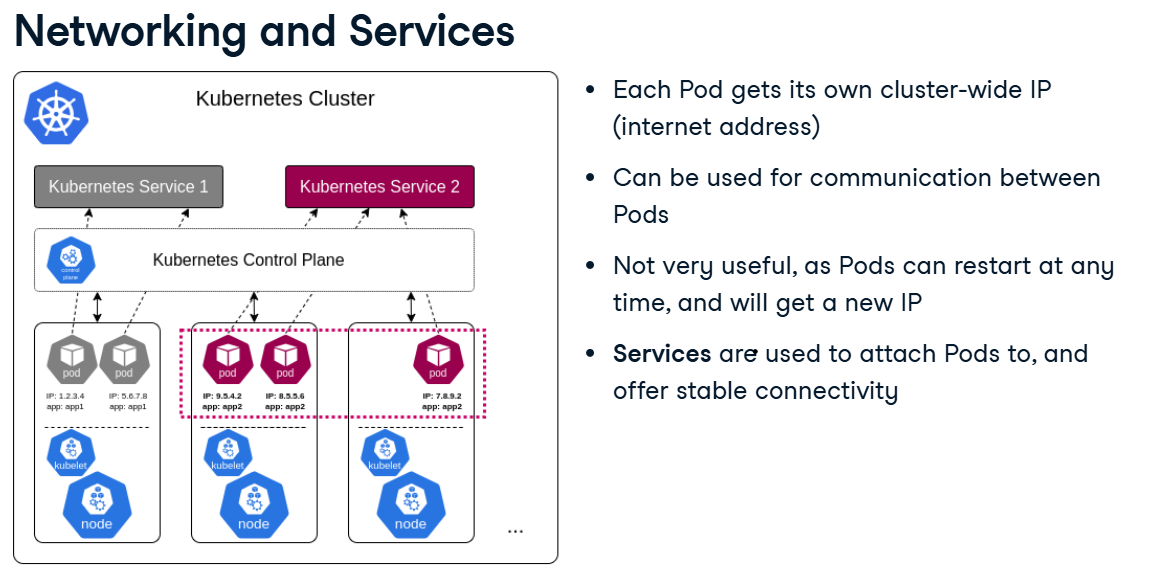

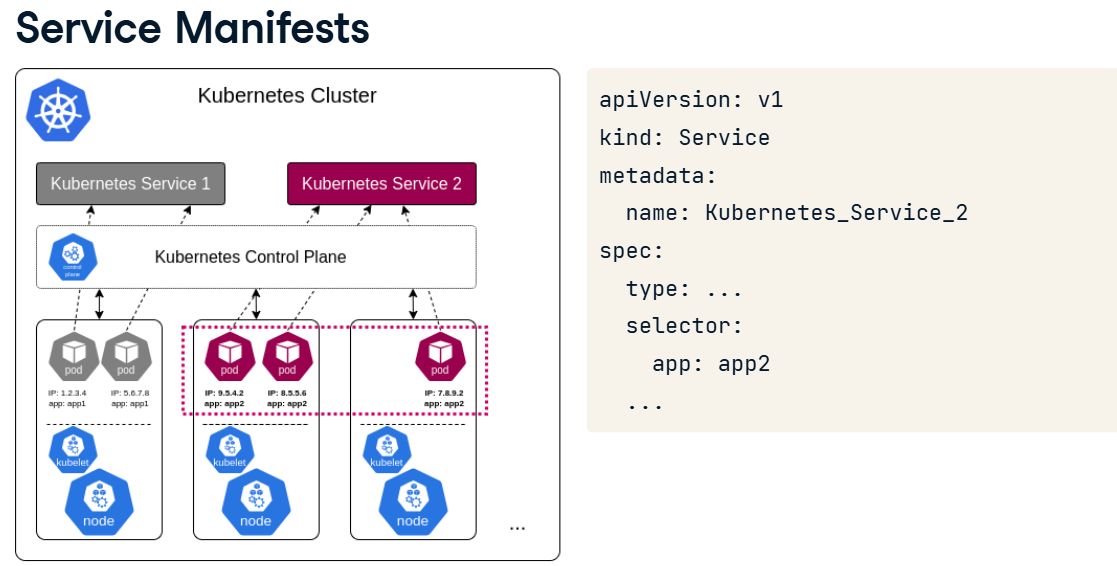

A load balancer simply distributes network requests evenly over Pods. This avoids uneven load, which leads to more efficiency and lower response times.

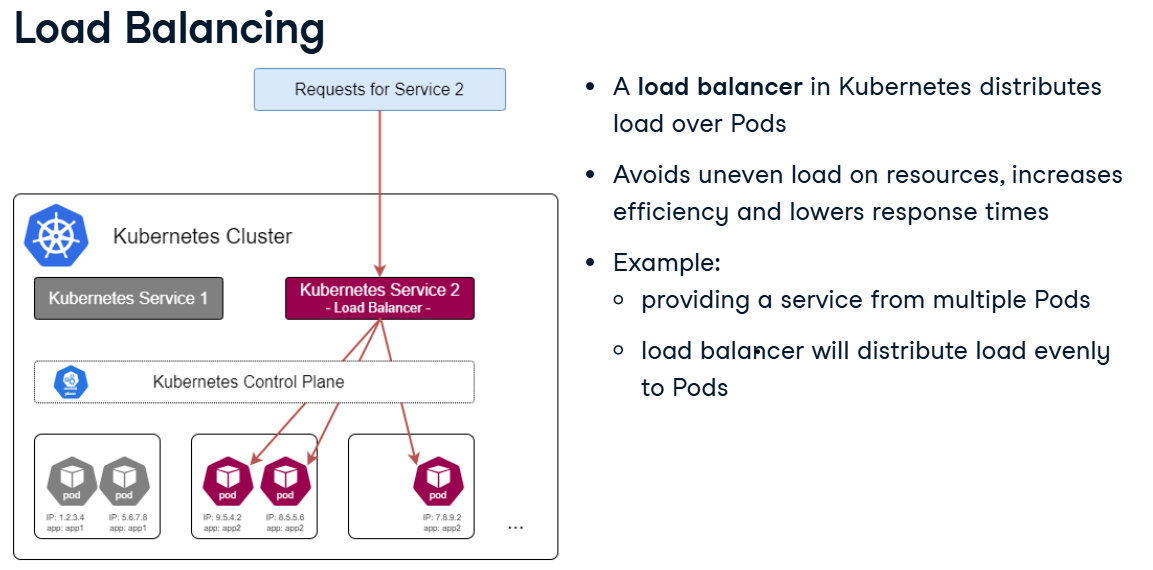

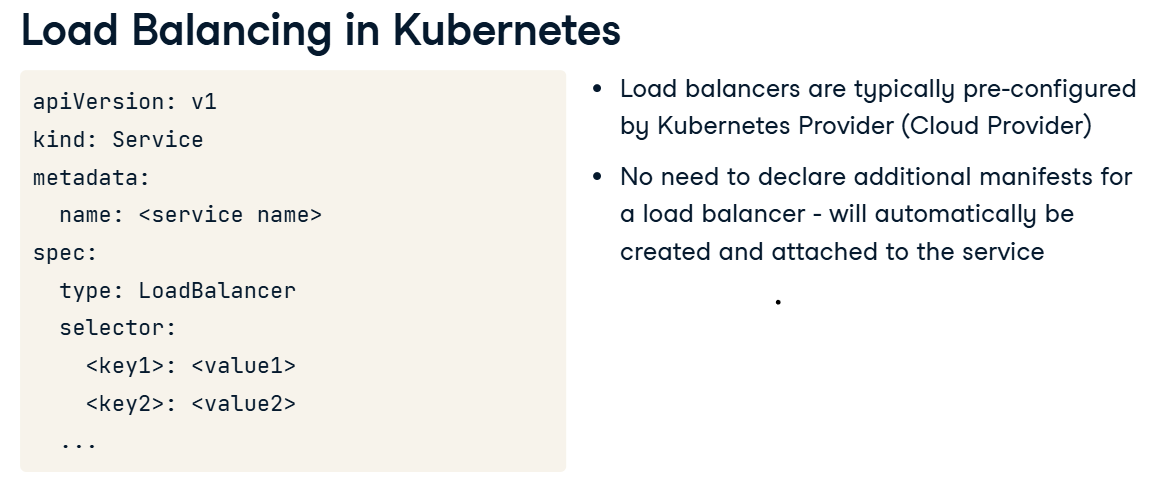

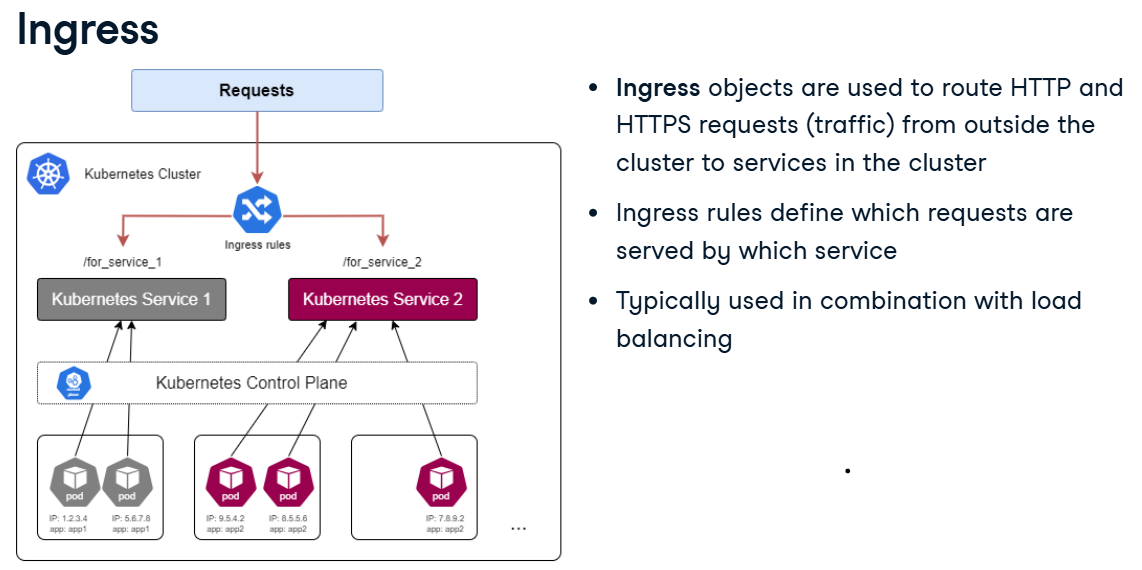

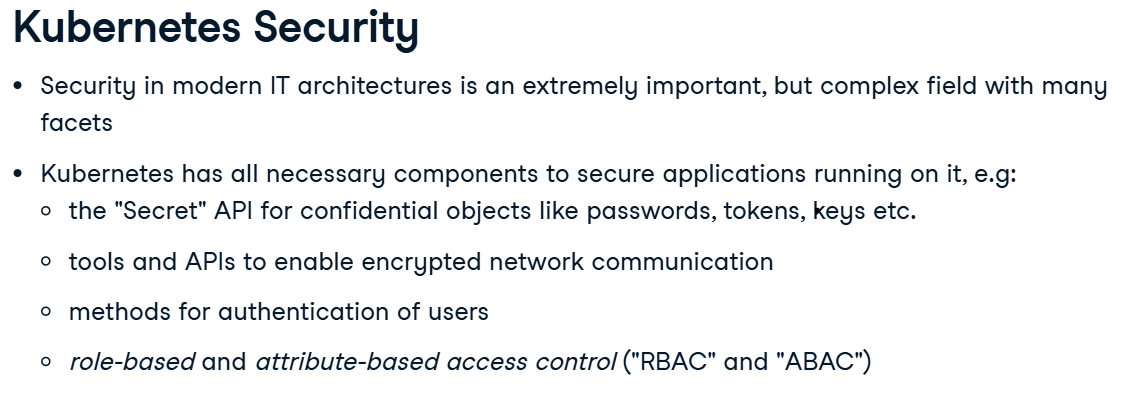

## Data Pipelines on Kubernetes
In the most general form, a data pipeline is a set of processes to move data from a source to a destination, transform data from one form into another, and analyze the data to get insights from it.

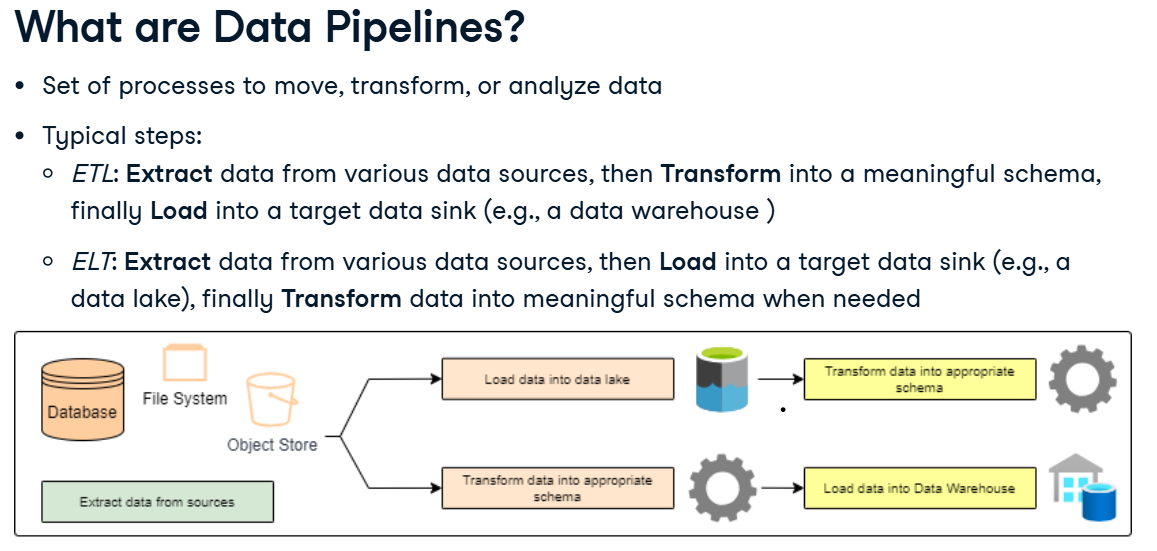

Our extract, transform, and load steps can be deployed using Deployments or StatefulSets, and the data that gets extracted and transformed can be stored using Persistent Volumes. Further, if we use scalable solutions for all of these steps, we can use Kubernetes to scale our Deployments and our storage where needed.

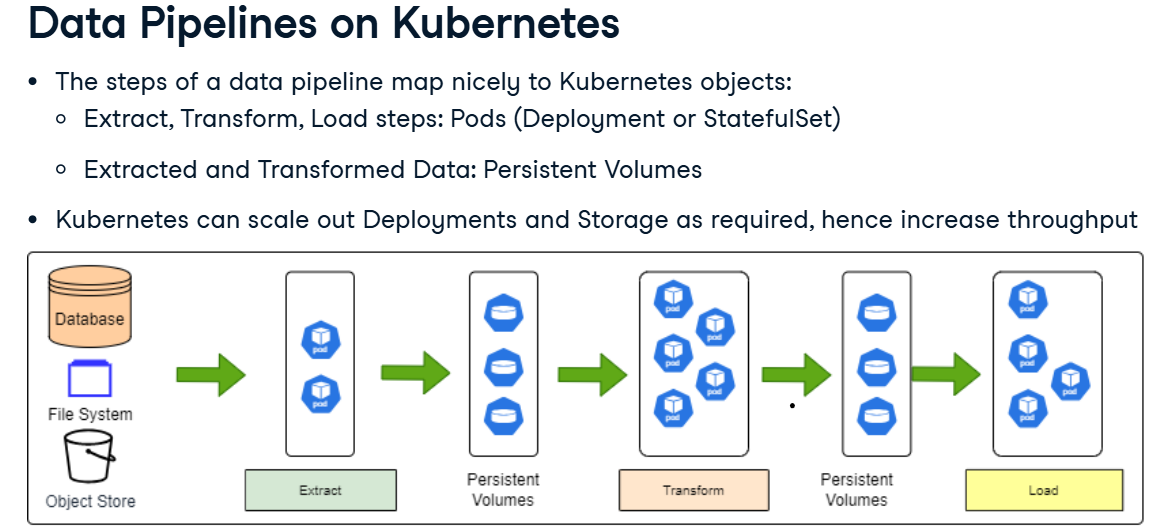

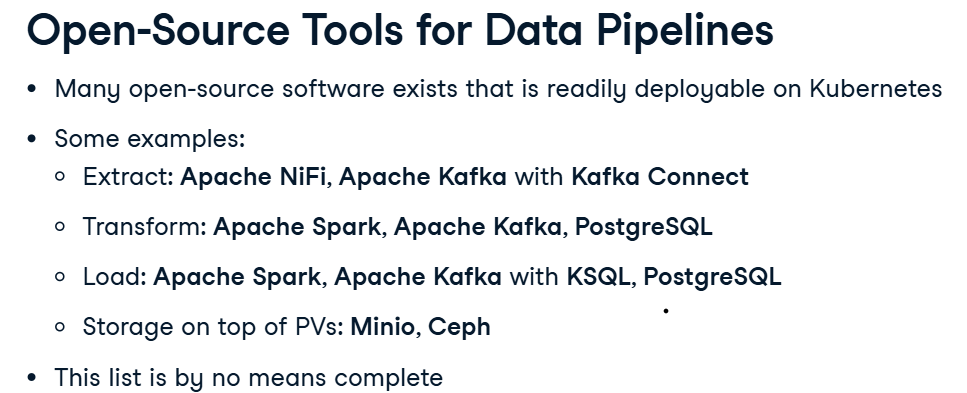

## MLOps on Kubernetes
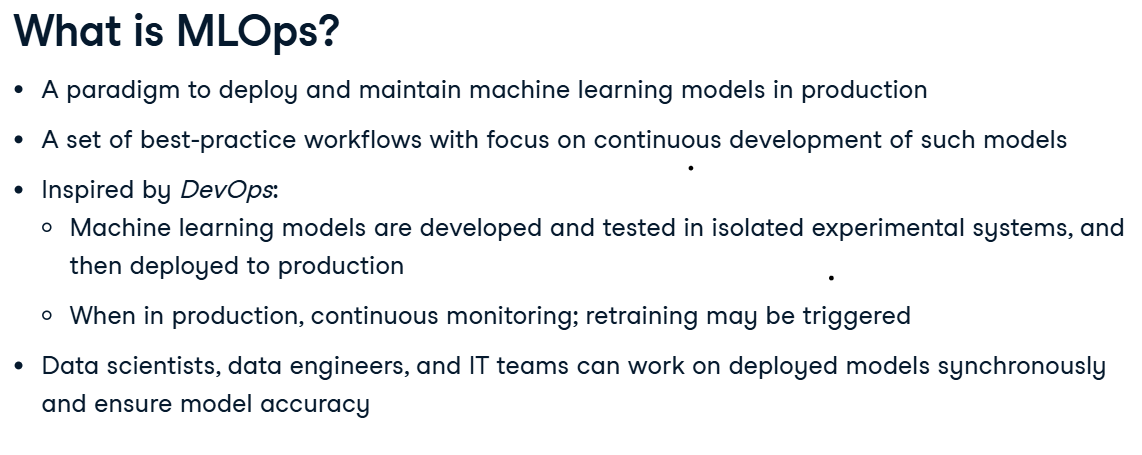

The paradigm of MLOps maps very well to Kubernetes. The isolated experimental systems that we need for development and testing can easily be realized by Pods and Kubernetes Storage, of course. We can monitor our productive ML models easily by following the lifecycle of our Pods, together with the images we have deployed. We can also work synchronously, as a team, on model accuracy, as this is enabled from the very beginning by the architecture of Kubernetes.

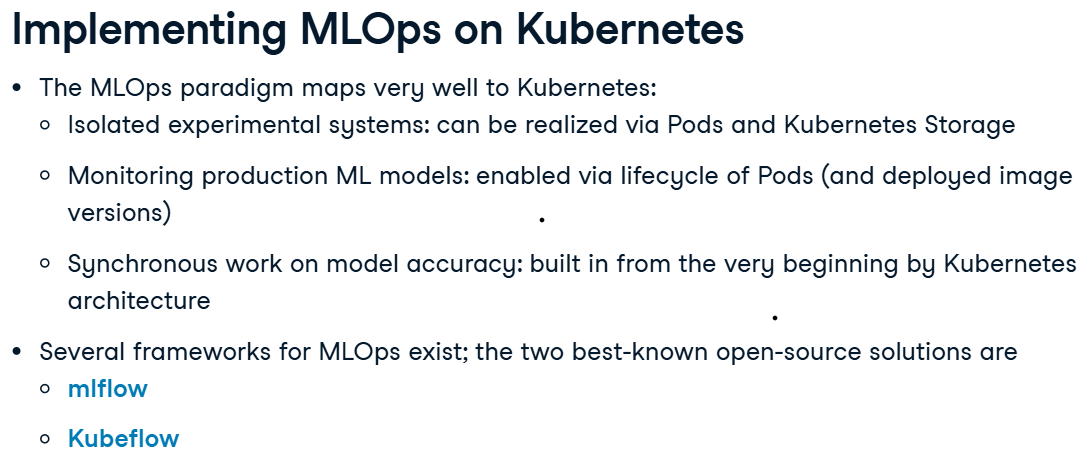

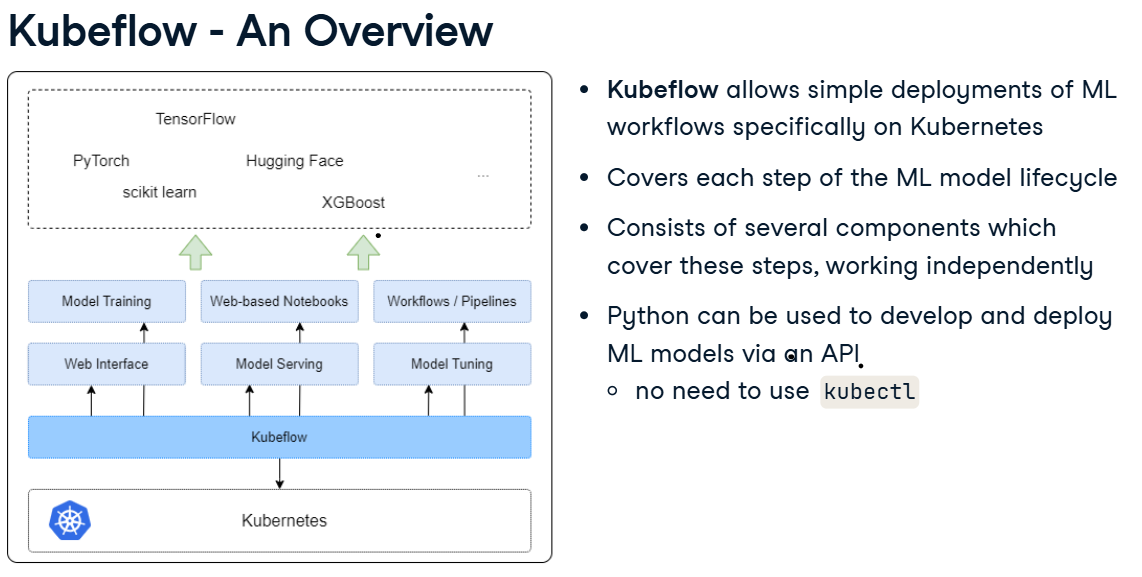

##  Summary of essential kubernetes commands
### Pods
| Action                         | Command                                                 |
| ------------------------------ | ------------------------------------------------------- |
| List all pods                  | `kubectl get pods`                                      |
| Get detailed info              | `kubectl describe pod <pod-name>`                       |
| View pod logs                  | `kubectl logs <pod-name>`                               |
| Exec into a pod (shell access) | `kubectl exec -it <pod-name> -- /bin/bash` or `/bin/sh` |
| Delete a pod                   | `kubectl delete pod <pod-name>`                         |

### Volumes and storage
| Action         | Command                           |
| -------------- | --------------------------------- |
| List PVCs      | `kubectl get pvc`                 |
| Describe a PVC | `kubectl describe pvc <pvc-name>` |
| List PVs       | `kubectl get pv`                  |
| Describe a PV  | `kubectl describe pv <pv-name>`   |

### Manifests and Resources
| Action                          | Command                                 |
| ------------------------------- | --------------------------------------- |
| Apply a manifest file           | `kubectl apply -f <file.yaml>`          |
| Apply all manifests in a folder | `kubectl apply -f <folder-path>/`       |
| Delete a resource               | `kubectl delete -f <file.yaml>`         |
| View a resource's YAML          | `kubectl get <resource> <name> -o yaml` |

### Troubleshooting
| Action                                       | Command                                                    |
| -------------------------------------------- | ---------------------------------------------------------- |
| Check pod events                             | `kubectl describe pod <pod-name>`                          |
| Get all events                               | `kubectl get events --sort-by=.metadata.creationTimestamp` |
| Check node status                            | `kubectl get nodes`                                        |
| View container logs in a multi-container pod | `kubectl logs <pod-name> -c <container-name>`              |

